Nama: Alfandi Firnando,
email : alfandifirnando73@gmail.com,
domisili kota: Pekanbaru

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [ ]:
#Download dataset yang telah disediakan dalam bentuk zip
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-31 19:50:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  26.7MB/s    in 12s     

2020-10-31 19:50:43 (25.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Mengekstrak file zip yang telah didownload
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#Melihat Struktur Data yang telah didownload
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

In [ ]:
#Melihat Jumlah data gambar tangan bentuk batu
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [ ]:
#Melihat Jumlah data gambar tangan bentuk gunting
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [ ]:
#Melihat Jumlah data gambar tangan bentuk kertas
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [ ]:
#Mendefenisikan nama directory
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

#Membuat direktori training dan validasi
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
#Membuat direktori gambar tangan bentuk batu
rock_dir = os.path.join(base_dir,'rock')

#Membuat direktori gambar tangan bentuk kertas
paper_dir = os.path.join(base_dir, 'paper')

#Membuat direktori gambar tangan bentuk gunting
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
#Membagi data dari directory rock menjadi data training dan data validasi, dengan ukuran data validasi 40%
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

#Membagi data dari directory scissors menjadi data training dan data validasi, , dengan ukuran data validasi 40%
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

#Membagi data dari directory paper menjadi data training dan data validasi, dengan ukuran data validasi 40%
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

In [ ]:
#Membuat direktori gambar tangan bentuk batu pada direktori data training
train_rock = os.path.join(train_dir, 'rock')

#Membuat direktori gambar tangan bentuk gunting pada direktori data training
train_scissors = os.path.join(train_dir, 'scissors')

#Membuat direktori gambar tangan bentuk kertas pada direktori data training
train_paper = os.path.join(train_dir, 'paper')

#Membuat direktori gambar tangan bentuk batu pada direktori data validasi
val_rock = os.path.join(validation_dir, 'rock')

#Membuat direktori gambar tangan bentuk gunting pada direktori data validasi
val_scissors = os.path.join(validation_dir, 'scissors')

#Membuat direktori gambar tangan bentuk kertas pada direktori data validasi
val_paper = os.path.join(validation_dir, 'paper')

In [ ]:
#Membuat directori baru di dalam directori training
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

#Membuat directori baru di dalam directori validasi
if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
import shutil
#Menyalin data training ke directori baru
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

#Menyalin data validasi ke directori baru
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
#Mengecek jumlah data training gambar tangan bentuk batu
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [ ]:
#Mengecek jumlah data validasi gambar bentuk batu
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [ ]:
#Mengecek jumlah data training gambar tangan bentuk gunting
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [ ]:
#Mengecek jumlah data validasi gambar tangan bentuk gunting
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [ ]:
#Mengecek jumlah data training gambar tangan bentuk kertas
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [ ]:
#Mengecek jumlah data validasi gambar tangan bentuk kertas
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [ ]:
#Membuat Objek ImageDataGenerator 
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20, #Merotasi gambar yang digunakan
    horizontal_flip = True, #Memutar gambar secara horizontal = Iya
    shear_range = 0.2, #Mengaplikasikan pergeseran sudut sebesar 0.2
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
#Mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
    train_dir, #Direktori data training
    target_size =(150,150), #Meresolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 32,
    class_mode = 'categorical' #Untuk masalah klasifikasi 3 kelas atau lebih maka menggunakan class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, #Direktori data latih
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical' 
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#Membuat model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
#Compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' untuk klasifikasi 3 kelas atau lebih
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#Latih model dengan model.fit 
history = model.fit(
    train_generator,
    steps_per_epoch = 25, #Berapa batch yang akan dieksekusi pada setiap epoch
    epochs = 20, #Bisa menambahkan eposchs jika akurasi model belum sepenuhnya optimal
    validation_data = validation_generator, #Menampilkan akurasi pengujian data validasi
    validation_steps = 5, #Berapa batch yang akan dieksekusi pada setiap epoch
    verbose =2
)

Epoch 1/20
25/25 - 43s - loss: 1.1642 - accuracy: 0.3537 - val_loss: 0.9846 - val_accuracy: 0.4875
Epoch 2/20
25/25 - 43s - loss: 0.8518 - accuracy: 0.6225 - val_loss: 0.3841 - val_accuracy: 0.8687
Epoch 3/20
25/25 - 43s - loss: 0.4044 - accuracy: 0.8637 - val_loss: 0.2573 - val_accuracy: 0.9312
Epoch 4/20
25/25 - 43s - loss: 0.2851 - accuracy: 0.8975 - val_loss: 0.1997 - val_accuracy: 0.9438
Epoch 5/20
25/25 - 42s - loss: 0.2434 - accuracy: 0.9175 - val_loss: 0.1839 - val_accuracy: 0.9250
Epoch 6/20
25/25 - 42s - loss: 0.1606 - accuracy: 0.9500 - val_loss: 0.1913 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 43s - loss: 0.1915 - accuracy: 0.9225 - val_loss: 0.1941 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 42s - loss: 0.1563 - accuracy: 0.9488 - val_loss: 0.1105 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 42s - loss: 0.0949 - accuracy: 0.9600 - val_loss: 0.0710 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 43s - loss: 0.1443 - accuracy: 0.9500 - val_loss: 0.1949 - val_accuracy: 0.9625
Epoch 11/

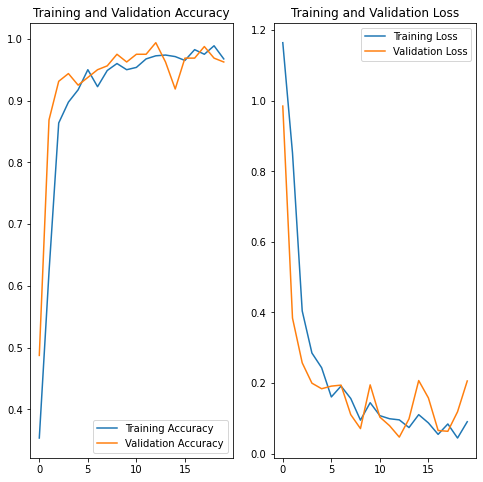

In [ ]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 4QtEaLUAuzeJZKdK.png to 4QtEaLUAuzeJZKdK.png
4QtEaLUAuzeJZKdK.png
rock


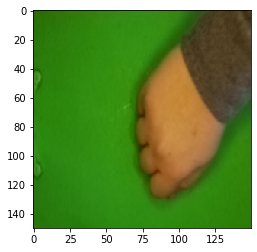

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')